In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
from numpy.linalg import eig, inv, det, eig
from IPython.display import Math, display

In [106]:
def display_parameters(mu, sigma):
    # Convert the mean vector and covariance matrix to LaTeX format
    mu_latex = vector_to_latex(mu)
    sigma_latex = matrix_to_latex(sigma)
    
    # Display the mean vector and covariance matrix
    display(Math(r"\text{Mean vector } \mu = " + mu_latex))
    display(Math(r"\text{Covariance matrix } \Sigma = " + sigma_latex))

def vector_to_latex(vector):
    """Formats a vector for display in LaTeX."""
    latex = '\\begin{bmatrix}' + ' \\\\ '.join(f'{num:.2f}' for num in vector) + '\\end{bmatrix}'
    return latex

def matrix_to_latex(matrix):
    """Formats a matrix for display in LaTeX."""
    latex = '\\begin{bmatrix}'
    rows, cols = matrix.shape
    for i in range(rows):
        row_items = ' & '.join(f'{num:.2f}' for num in matrix[i])
        latex += row_items + ' \\\\ '
    latex += '\\end{bmatrix}'
    return latex

# Define your mean vector and covariance matrix
mu = np.array([1, 3])  # Mean vector
sigma12 = -0.8 * np.sqrt(2) * np.sqrt(1)
sigma = np.array([
    [2, sigma12],
    [sigma12, 1]
])

# Call the function to display the parameters
display_parameters(mu, sigma)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [107]:
# Function to calculate and display properties of the covariance matrix with detailed formulas
def calculate_and_display_matrix_properties(sigma):
    # Calculate transpose, inverse, and determinant
    sigma_T = sigma.T
    sigma_inv = inv(sigma)
    sigma_det = det(sigma)
    
    # Display the original matrix with formula
    matrix_latex = '\\Sigma = ' + matrix_to_latex(sigma)
    display(Math(matrix_latex))
    
    # Display the transpose with formula
    transpose_latex = '\\Sigma^T = ' + matrix_to_latex(sigma_T)
    display(Math(transpose_latex))
    
    # Display the inverse with formula
    inverse_latex = '\\Sigma^{-1} = ' + matrix_to_latex(sigma_inv)
    display(Math(inverse_latex))
    
    # Display the determinant with formula
    det_latex = f' |\\Sigma| = {sigma_det:.3f}'
    display(Math(det_latex))

# Helper function to convert matrix into LaTeX format
def matrix_to_latex(matrix):
    latex = '\\begin{bmatrix}'
    rows, cols = matrix.shape
    for i in range(rows):
        row_items = ' & '.join(format_number(matrix[i, j]) for j in range(cols))
        latex += row_items + ' \\\\ '
    latex += '\\end{bmatrix}'
    return latex

def format_number(num):
    """Format the number as an integer if it is effectively an integer, else to three decimal places."""
    if num % 1 == 0:  # Effectively an integer
        return str(int(num))
    else:  # A floating point number
        return f'{num:.3f}'

# Run the function to display the matrix properties
calculate_and_display_matrix_properties(sigma)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [108]:
def display_eigenvalue_eigenvector_details(mu, sigma):
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eig(sigma)
    
    # Display the calculation of eigenvalues and eigenvectors
    display(Math(r"\text{Given the covariance matrix } \Sigma = " + matrix_to_latex(sigma)))
    display(Math(r"\text{and mean vector } \mu = " + vector_to_latex(mu)))
    
    eigenvalue_latex = r"\text{Eigenvalues } \lambda \text{ and corresponding eigenvectors are calculated using the characteristic polynomial } \det(\Sigma - \lambda I) = 0."
    display(Math(eigenvalue_latex))
    
    # Display eigenvalues and eigenvectors
    for i, (eigenvalue, eigenvector) in enumerate(zip(eigenvalues, eigenvectors.T), 1):
        # Display eigenvalue
        eigenvalue_latex = f"\\lambda_{{{i}}} = {eigenvalue:.3f}"
        display(Math(eigenvalue_latex))
        # Display eigenvector
        eigenvector_latex = f"\\text{{Eigenvector }} v_{{{i}}} = " + vector_to_latex(eigenvector)
        display(Math(eigenvector_latex))
        # Display normalization process
        norm = np.linalg.norm(eigenvector)
        normalized_vec = eigenvector / norm
        normalization_process_latex = f"\\text{{Normalized eigenvector }} \\hat{{v}}_{{{i}}} = " + vector_to_latex(normalized_vec)
        display(Math(normalization_process_latex))

def matrix_to_latex(matrix):
    latex = '\\begin{bmatrix}'
    rows, cols = matrix.shape
    for i in range(rows):
        row_items = ' & '.join(f'{num:.2f}' for num in matrix[i])
        latex += row_items + ' \\\\ '
    latex += '\\end{bmatrix}'
    return latex

def vector_to_latex(vector):
    latex = '\\begin{bmatrix}'
    latex += ' \\\\ '.join(f'{num:.2f}' for num in vector)
    latex += '\\end{bmatrix}'
    return latex

# Call the function to display the results
display_eigenvalue_eigenvector_details(mu, sigma)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

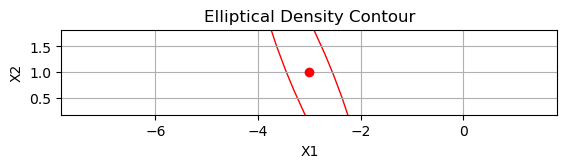

In [109]:
def plot_ellipse(mu, sigma):
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eig(sigma)
    
    # Sort the eigenvalues and eigenvectors
    order = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[order]
    eigenvectors = eigenvectors[:, order]
    
    # Calculate angle and widths of the ellipse
    angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
    width, height = 2 * np.sqrt(eigenvalues)  # 2*sqrt(lambda) for the axes lengths
    
    # Display the equation of the ellipse
    display(Math(r"\text{Equation of the ellipse: } \frac{(x - \mu_1)^2}{a^2} + \frac{(y - \mu_2)^2}{b^2} = 1"))
    display(Math(r"\text{where } \mu_1 = " + f"{mu[0]:.2f}" + r", \ \mu_2 = " + f"{mu[1]:.2f}" + r", \ a = " + f"{width/2:.2f}" + r", \ b = " + f"{height/2:.2f}"))
    
    # Plot the ellipse
    fig, ax = plt.subplots()
    ellipse = Ellipse(xy=mu[:2], width=width, height=height, angle=np.degrees(angle), edgecolor='r', facecolor='none')
    ax.add_patch(ellipse)
    ax.set_xlim(mu[0] - width, mu[0] + width)
    ax.set_ylim(mu[1] - height, mu[1] + height)
    ax.plot(mu[0], mu[1], 'ro')  # Plot the mean as a red dot
    ax.set_aspect('equal', 'box')
    plt.grid(True)
    plt.title('Elliptical Density Contour')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# Mean vector and covariance matrix (corrected dimensions for 2D visualization)
mu = np.array([-3, 1])  # Mean vector for x1, x2
sigma = np.array([[1, -2], [-2, 5]])  # Covariance matrix for x1, x2

# Call the function with the two dimensions
plot_ellipse(mu, sigma)